In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("E:/test.xlsx")

In [3]:
data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1.0,188.0,Feed,silt,1.0,0.0,NaN,0.0,2.0
1,2.0,410.0,Feed,silt,1.0,0.0,0.0,0.0,2.0
2,3.0,626.0,Feed,clay,1.0,0.0,0.0,0.0,2.0
3,4.0,731.0,Feed,clay,1.0,0.0,0.0,0.0,2.0
4,5.0,789.0,Food,clay,1.0,0.0,0.0,0.0,1.0


In [4]:
data=pd.read_excel("E:/train.xlsx")

In [5]:
data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1.0,188.0,Feed,clay,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,209.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
2,3.0,257.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
3,4.0,257.0,Feed,silt,1.0,0.0,0.0,0.0,2.0,1.0
4,5.0,342.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  float64
 1   Insects                     80000 non-null  float64
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  float64
 5   Does_count                  80000 non-null  float64
 6   Number_of_Weeks_Used        71945 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  float64
 8   Season                      80000 non-null  float64
 9   Crop_status                 80000 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.1+ MB


In [7]:
data.describe()

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
count,80000.000000,80000.000000,80000.000000,80000.000000,71945.000000,80000.000000,80000.000000,80000.000000
mean,40000.500000,1400.020875,2.267587,25.846750,28.664480,9.549088,1.897575,0.192312
std,23094.155105,849.792471,0.463748,15.557246,12.424751,9.905547,0.702079,0.455912
min,1.000000,150.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,20000.750000,731.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,40000.500000,1212.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,60000.250000,1898.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,80000.000000,4097.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [8]:
data.columns

Index(['ID', 'Insects', 'Crop', 'Soil', 'Category_of_Toxicant', 'Does_count',
       'Number_of_Weeks_Used', 'Number_Weeks_does_not used', 'Season',
       'Crop_status'],
      dtype='object')

In [9]:
data.drop

<bound method DataFrame.drop of             ID  Insects  Crop  Soil  Category_of_Toxicant  Does_count  \
0          1.0    188.0  Feed  clay                   1.0         0.0   
1          2.0    209.0  Feed  clay                   1.0         0.0   
2          3.0    257.0  Feed  clay                   1.0         0.0   
3          4.0    257.0  Feed  silt                   1.0         0.0   
4          5.0    342.0  Feed  clay                   1.0         0.0   
...        ...      ...   ...   ...                   ...         ...   
79995  79996.0    209.0  Food  silt                   2.0        20.0   
79996  79997.0    232.0  Food  silt                   2.0        20.0   
79997  79998.0    256.0  Food  silt                   2.0        10.0   
79998  79999.0    256.0  Food  silt                   2.0        10.0   
79999  80000.0    256.0  Food  silt                   2.0        20.0   

       Number_of_Weeks_Used  Number_Weeks_does_not used  Season  Crop_status  
0           

In [10]:
data.value_counts()

ID       Insects  Crop  Soil  Category_of_Toxicant  Does_count  Number_of_Weeks_Used  Number_Weeks_does_not used  Season  Crop_status
1.0      188.0    Feed  clay  1.0                   0.0         0.0                   0.0                         1.0     0.0            1
53381.0  2139.0   Feed  clay  2.0                   20.0        28.0                  10.0                        3.0     0.0            1
53387.0  2267.0   Feed  clay  2.0                   20.0        21.0                  28.0                        2.0     0.0            1
53386.0  2267.0   Feed  clay  2.0                   20.0        17.0                  16.0                        1.0     0.0            1
53385.0  2267.0   Feed  clay  2.0                   15.0        40.0                  2.0                         2.0     0.0            1
                                                                                                                                        ..
26682.0  3336.0   Food  clay  2.

In [11]:
train_data = pd.read_excel("E:/test.xlsx")
test_data = pd.read_excel("E:/train.xlsx")

In [12]:
train_data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1.0,188.0,Feed,silt,1.0,0.0,NaN,0.0,2.0
1,2.0,410.0,Feed,silt,1.0,0.0,0.0,0.0,2.0
2,3.0,626.0,Feed,clay,1.0,0.0,0.0,0.0,2.0
3,4.0,731.0,Feed,clay,1.0,0.0,0.0,0.0,2.0
4,5.0,789.0,Food,clay,1.0,0.0,0.0,0.0,1.0


In [13]:
train_data.shape

(35000, 9)

In [14]:
test_data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1.0,188.0,Feed,clay,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,209.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
2,3.0,257.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
3,4.0,257.0,Feed,silt,1.0,0.0,0.0,0.0,2.0,1.0
4,5.0,342.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0


In [15]:
test_data.shape

(80000, 10)

In [16]:
train_data.isnull().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          3542
Number_Weeks_does_not used       0
Season                           0
dtype: int64

In [17]:
test_data.isnull().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

In [18]:
data[data['Number_of_Weeks_Used'].isnull()]

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
5,6.0,448.0,Food,silt,1.0,0.0,NaN,0.0,2.0,1.0
6,7.0,448.0,Food,silt,1.0,0.0,NaN,0.0,2.0,1.0
10,11.0,1212.0,Feed,clay,1.0,0.0,NaN,0.0,3.0,0.0
17,18.0,2401.0,Food,silt,1.0,0.0,NaN,0.0,1.0,1.0
35,36.0,257.0,Food,clay,3.0,30.0,NaN,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...
79925,79926.0,2688.0,Food,clay,2.0,20.0,NaN,21.0,3.0,1.0
79928,79929.0,2688.0,Food,clay,2.0,20.0,NaN,10.0,1.0,1.0
79954,79955.0,2999.0,Food,clay,2.0,20.0,NaN,37.0,2.0,1.0
79962,79963.0,3165.0,Food,clay,2.0,30.0,NaN,4.0,1.0,0.0


In [19]:
data.notnull().head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True


C:\Users\Yukthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Category_of_Toxicant')

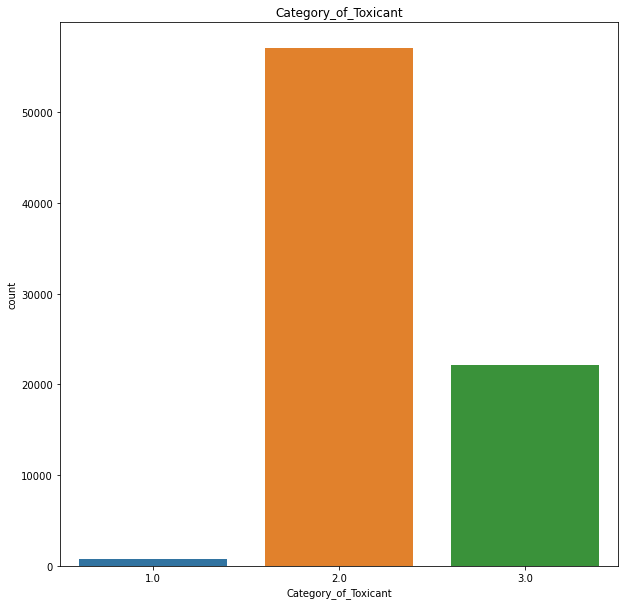

In [20]:
sns.countplot(data['Category_of_Toxicant'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Category_of_Toxicant')

C:\Users\Yukthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Insects')

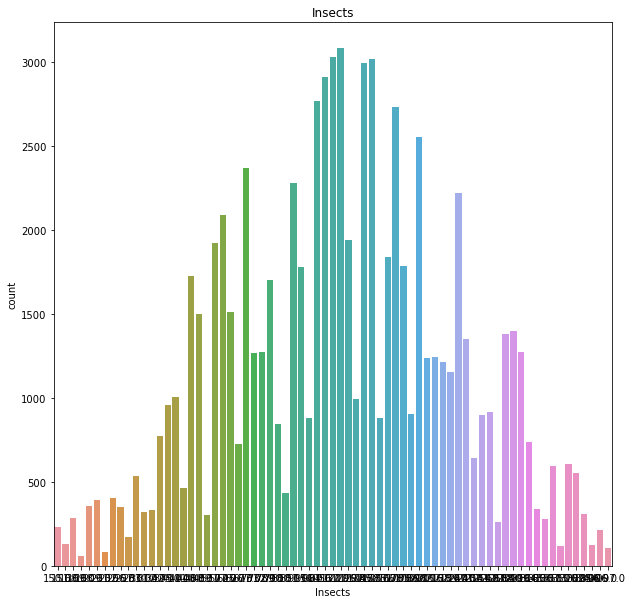

In [21]:
sns.countplot(data['Insects'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Insects')

C:\Users\Yukthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Season')

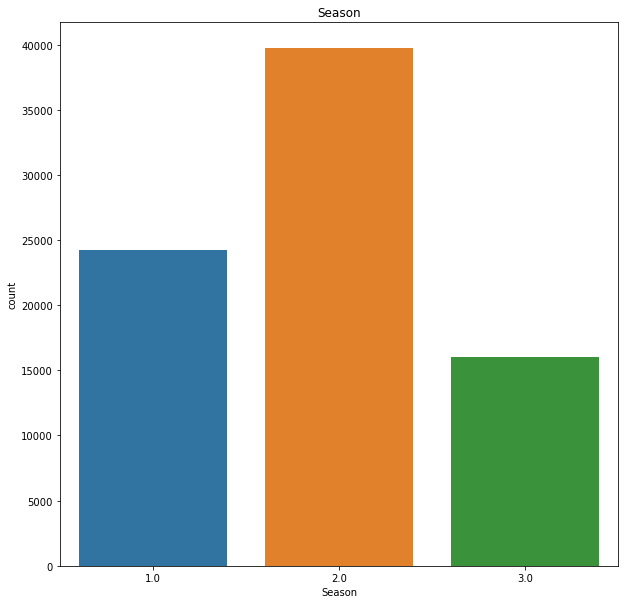

In [22]:
sns.countplot(data['Season'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Season')

C:\Users\Yukthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Does_count', ylabel='count'>

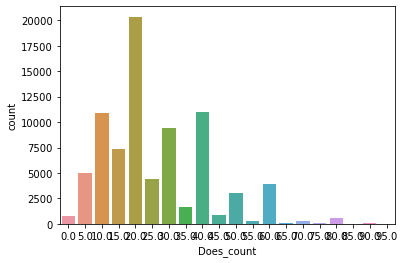

In [23]:
sns.countplot(data.Does_count)

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
dummy=pd.get_dummies(data)

In [26]:
dummy.shape

(80000, 12)

In [27]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  float64
 1   Insects                     80000 non-null  float64
 2   Category_of_Toxicant        80000 non-null  float64
 3   Does_count                  80000 non-null  float64
 4   Number_of_Weeks_Used        71945 non-null  float64
 5   Number_Weeks_does_not used  80000 non-null  float64
 6   Season                      80000 non-null  float64
 7   Crop_status                 80000 non-null  float64
 8   Crop_Feed                   80000 non-null  uint8  
 9   Crop_Food                   80000 non-null  uint8  
 10  Soil_clay                   80000 non-null  uint8  
 11  Soil_silt                   80000 non-null  uint8  
dtypes: float64(8), uint8(4)
memory usage: 5.2 MB


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  float64
 1   Insects                     80000 non-null  float64
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  float64
 5   Does_count                  80000 non-null  float64
 6   Number_of_Weeks_Used        71945 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  float64
 8   Season                      80000 non-null  float64
 9   Crop_status                 80000 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.1+ MB


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler=MinMaxScaler()
print(scaler.fit(dummy))

MinMaxScaler()


In [31]:
scalerdata=scaler.transform(dummy)
print(scaler.transform(dummy))

[[0.00000000e+00 9.62756524e-03 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.25001563e-05 1.49480618e-02 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.50003125e-05 2.71091969e-02 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [9.99975000e-01 2.68558399e-02 5.00000000e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [9.99987500e-01 2.68558399e-02 5.00000000e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.68558399e-02 5.00000000e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [32]:
from sklearn import preprocessing

In [33]:
X= pd.DataFrame(scalerdata)

In [34]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.009628,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000013,0.014948,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,1.0,0.0
2,0.000025,0.027109,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,1.0,0.0
3,0.000038,0.027109,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,0.0,1.0
4,0.000050,0.048645,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,1.0,0.0


In [35]:
X.shape

(80000, 12)

In [36]:
X.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
79995,0.999950,0.014948,0.5,0.210526,0.179104,0.12,0.5,0.0,0.0,1.0,0.0,1.0
79996,0.999962,0.020775,0.5,0.210526,0.179104,0.18,0.0,0.0,0.0,1.0,0.0,1.0
79997,0.999975,0.026856,0.5,0.105263,0.208955,0.20,0.0,0.0,0.0,1.0,0.0,1.0
79998,0.999987,0.026856,0.5,0.105263,0.238806,0.16,0.5,0.0,0.0,1.0,0.0,1.0
79999,1.000000,0.026856,0.5,0.210526,0.164179,0.20,0.5,0.0,0.0,1.0,0.0,1.0


In [37]:
x=X.iloc[:8523]
Test=X.iloc[8523:]

In [38]:
x=data.iloc[:,2:3].values
y=data.iloc[:,3:4].values

In [39]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/4,random_state=0)

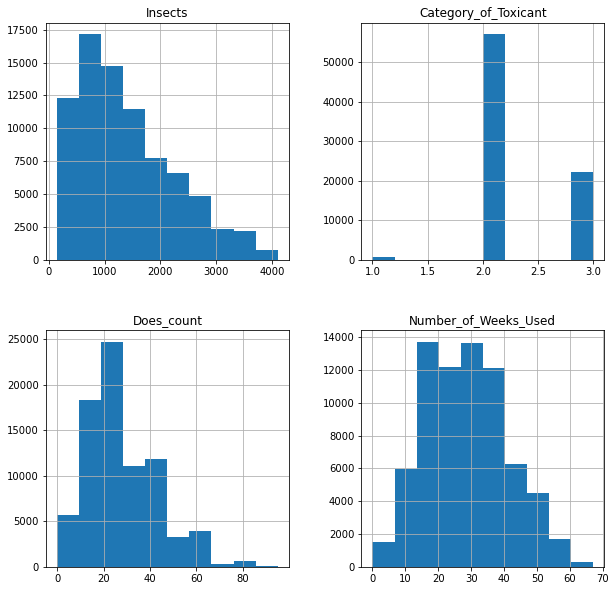

In [42]:
columns=data.columns.tolist()
num_col_eda=['Insects','Crop','Soil','Category_of_Toxicant','Does_count','Number_of_Weeks_Used']
data[num_col_eda].hist(figsize=(10,10))
plt.show()

In [123]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test)

(60000, 1)
(20000, 1)
(60000, 1)
[['clay']
 ['clay']
 ['silt']
 ...
 ['clay']
 ['clay']
 ['silt']]


In [124]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [125]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [126]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [127]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [128]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [129]:
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80000 non-null  float64
 1   Insects                     80000 non-null  float64
 2   Crop                        80000 non-null  object 
 3   Soil                        80000 non-null  object 
 4   Category_of_Toxicant        80000 non-null  float64
 5   Does_count                  80000 non-null  float64
 6   Number_of_Weeks_Used        71945 non-null  float64
 7   Number_Weeks_does_not used  80000 non-null  float64
 8   Season                      80000 non-null  float64
 9   Crop_status                 80000 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.1+ MB


In [131]:
lgb_data = data.copy()
lgb_data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1.0,188.0,Feed,clay,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,209.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
2,3.0,257.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
3,4.0,257.0,Feed,silt,1.0,0.0,0.0,0.0,2.0,1.0
4,5.0,342.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0


In [132]:
lgb_dummy = pd.get_dummies(lgb_data, drop_first=True) 
lgb_dummy.head()

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Food,Soil_silt
0,1.0,188.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
1,2.0,209.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0
2,3.0,257.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0
3,4.0,257.0,1.0,0.0,0.0,0.0,2.0,1.0,0,1
4,5.0,342.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0


In [133]:
lgb_data = pd.concat([lgb_dummy, lgb_data], axis=1) # concatenating dummy columns to the original dataframe
lgb_data.head()

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Food,Soil_silt,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1.0,188.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0,188.0,Feed,clay,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,209.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0,2.0,209.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
2,3.0,257.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0,3.0,257.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
3,4.0,257.0,1.0,0.0,0.0,0.0,2.0,1.0,0,1,4.0,257.0,Feed,silt,1.0,0.0,0.0,0.0,2.0,1.0
4,5.0,342.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0,5.0,342.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0


In [134]:
lgb_data.rename(columns={'Category_of_Toxicant_yes': 'Category_of_Toxicant'}, inplace=True) # renaming the column
lgb_data.head()

,ID,Insects,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Food,Soil_silt,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1.0,188.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0,188.0,Feed,clay,1.0,0.0,0.0,0.0,1.0,0.0
1,2.0,209.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0,2.0,209.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
2,3.0,257.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0,3.0,257.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0
3,4.0,257.0,1.0,0.0,0.0,0.0,2.0,1.0,0,1,4.0,257.0,Feed,silt,1.0,0.0,0.0,0.0,2.0,1.0
4,5.0,342.0,1.0,0.0,0.0,0.0,2.0,1.0,0,0,5.0,342.0,Feed,clay,1.0,0.0,0.0,0.0,2.0,1.0


In [135]:
y_df = lgb_data['Category_of_Toxicant'].reset_index(drop=True) #  creating the label column
display(y_df.head())

,Category_of_Toxicant,Category_of_Toxicant
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [136]:
x_df = lgb_data.drop(columns='Category_of_Toxicant') # selecting the feature columns
x_df.head()

,ID,Insects,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Food,Soil_silt,ID,Insects,Crop,Soil,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1.0,188.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0,188.0,Feed,clay,0.0,0.0,0.0,1.0,0.0
1,2.0,209.0,0.0,0.0,0.0,2.0,1.0,0,0,2.0,209.0,Feed,clay,0.0,0.0,0.0,2.0,1.0
2,3.0,257.0,0.0,0.0,0.0,2.0,1.0,0,0,3.0,257.0,Feed,clay,0.0,0.0,0.0,2.0,1.0
3,4.0,257.0,0.0,0.0,0.0,2.0,1.0,0,1,4.0,257.0,Feed,silt,0.0,0.0,0.0,2.0,1.0
4,5.0,342.0,0.0,0.0,0.0,2.0,1.0,0,0,5.0,342.0,Feed,clay,0.0,0.0,0.0,2.0,1.0


In [137]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.20) # splitting the training and test data

In [138]:
print('Sample Training Data')
display(train_x.head())
print('Sample Test Data')
display(test_x.head())

Sample Training Data


,ID,Insects,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Food,Soil_silt,ID,Insects,Crop,Soil,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
23736,23737.0,851.0,10.0,NaN,17.0,3.0,0.0,1,0,23737.0,851.0,Food,clay,10.0,NaN,17.0,3.0,0.0
71913,71914.0,851.0,20.0,28.0,5.0,2.0,0.0,1,0,71914.0,851.0,Food,clay,20.0,28.0,5.0,2.0,0.0
4084,4085.0,625.0,60.0,20.0,15.0,2.0,0.0,1,1,4085.0,625.0,Food,silt,60.0,20.0,15.0,2.0,0.0
12717,12718.0,625.0,0.0,0.0,0.0,1.0,1.0,0,1,12718.0,625.0,Feed,silt,0.0,0.0,0.0,1.0,1.0
73781,73782.0,915.0,10.0,40.0,0.0,2.0,0.0,1,0,73782.0,915.0,Food,clay,10.0,40.0,0.0,2.0,0.0


Sample Test Data


,ID,Insects,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status,Crop_Food,Soil_silt,ID,Insects,Crop,Soil,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
9131,9132.0,851.0,35.0,19.0,18.0,3.0,0.0,1,1,9132.0,851.0,Food,silt,35.0,19.0,18.0,3.0,0.0
54766,54767.0,209.0,20.0,15.0,0.0,2.0,0.0,1,1,54767.0,209.0,Food,silt,20.0,15.0,0.0,2.0,0.0
77474,77475.0,3702.0,20.0,38.0,25.0,2.0,1.0,1,0,77475.0,3702.0,Food,clay,20.0,38.0,25.0,2.0,1.0
13691,13692.0,1056.0,50.0,39.0,3.0,1.0,0.0,1,0,13692.0,1056.0,Food,clay,50.0,39.0,3.0,1.0,0.0
49861,49862.0,677.0,10.0,26.0,9.0,3.0,0.0,1,1,49862.0,677.0,Food,silt,10.0,26.0,9.0,3.0,0.0


In [139]:
print('Sample Training Labels')
display(train_y.head())
print('Sample Test Labels')
display(test_y.head())

Sample Training Labels


,Category_of_Toxicant,Category_of_Toxicant
23736,2.0,2.0
71913,2.0,2.0
4084,2.0,2.0
12717,1.0,1.0
73781,3.0,3.0


Sample Test Labels


,Category_of_Toxicant,Category_of_Toxicant
9131,2.0,2.0
54766,2.0,2.0
77474,2.0,2.0
13691,2.0,2.0
49861,2.0,2.0


{'whiskers': [<matplotlib.lines.Line2D at 0x18d5ca8c760>,
 'caps': [<matplotlib.lines.Line2D at 0x18d5ca8cd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x18d5ca8c490>],
 'medians': [<matplotlib.lines.Line2D at 0x18d5ca952e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18d5ca955b0>],
 'means': []}

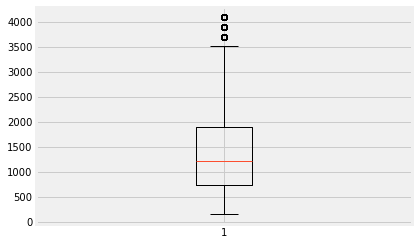

In [140]:
plt.boxplot(data.Insects)

<AxesSubplot:xlabel='Insects', ylabel='count'>

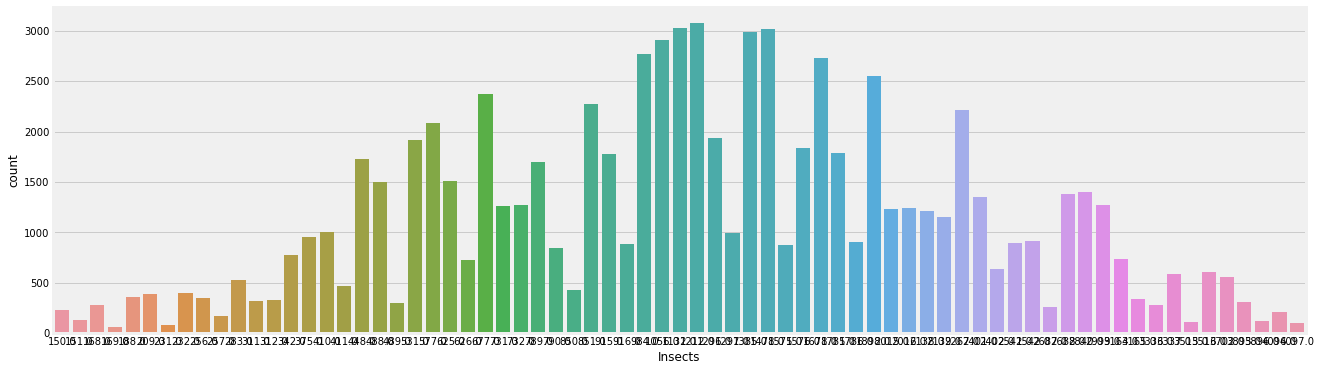

In [141]:
plt.figure(figsize=(20,6))
sns.countplot(x='Insects',data=data)

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler=MinMaxScaler()
print(scaler.fit(dummy))

MinMaxScaler()


In [144]:
scalerdata=scaler.transform(dummy)
print(scaler.transform(dummy))

[[0.00000000e+00 9.62756524e-03 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.25001563e-05 1.49480618e-02 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [2.50003125e-05 2.71091969e-02 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [9.99975000e-01 2.68558399e-02 5.00000000e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [9.99987500e-01 2.68558399e-02 5.00000000e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.68558399e-02 5.00000000e-01 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]]


In [145]:
from sklearn import preprocessing

In [146]:
X= pd.DataFrame(scalerdata)

In [147]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.009628,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.000013,0.014948,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,1.0,0.0
2,0.000025,0.027109,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,1.0,0.0
3,0.000038,0.027109,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,0.0,1.0
4,0.000050,0.048645,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.0,1.0,0.0


In [148]:
X.shape

(80000, 12)

In [149]:
X.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
79995,0.999950,0.014948,0.5,0.210526,0.179104,0.12,0.5,0.0,0.0,1.0,0.0,1.0
79996,0.999962,0.020775,0.5,0.210526,0.179104,0.18,0.0,0.0,0.0,1.0,0.0,1.0
79997,0.999975,0.026856,0.5,0.105263,0.208955,0.20,0.0,0.0,0.0,1.0,0.0,1.0
79998,0.999987,0.026856,0.5,0.105263,0.238806,0.16,0.5,0.0,0.0,1.0,0.0,1.0
79999,1.000000,0.026856,0.5,0.210526,0.164179,0.20,0.5,0.0,0.0,1.0,0.0,1.0


In [150]:
x=X.iloc[:8523]
Test=X.iloc[8523:]

In [151]:
x=data.iloc[:,2:3].values
y=data.iloc[:,3:4].values

In [152]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score 

In [153]:
from sklearn.model_selection import train_test_split

In [170]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [171]:
from sklearn.ensemble import GradientBoostingRegressor

In [182]:
from sklearn.linear_model import LinearRegression
data_model = LinearRegression()

In [ ]:
data_model.fit(X_train,y_train)

In [184]:
data = pd.get_dummies(data=data)

In [175]:
data.head()

,LinearRegression()
0,1


In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X_test.shape

(26400, 12)

In [178]:
y_test.shape

(26400, 1)

In [179]:
from sklearn.linear_model import LinearRegression

In [185]:
data_model = LinearRegression()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model3=GradientBoostingRegressor(n_estimators = 100, random_state = 0)
model3.fit(X_train, y_train)

In [ ]:
model3.score(X_train,y_train)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test_y,pre_y,squared=False)